## This notebook will construct the nodes and edges that we will build our graph with

Import relevant libraries and import raw data

In [1]:
import seaborn as sns
import pandas as pd
from scipy.signal import find_peaks
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
os_name = os.name

if os_name == 'nt':
    password = os.getenv('NEO4J_Password')
    neo4j_directory = os.getenv('NEO4J_Directory')
else:
    password = os.environ['NEO4J_Password']
    neo4j_directory = os.environ['NEO4J_Directory']

In [3]:
df = pd.read_csv("../../data/current_clean_spectrum.csv")

In [4]:
def normalise(absorbances):
    max_value = np.max(absorbances)
    normalized_absorbances = absorbances / max_value
    return normalized_absorbances

df['Absorbance'] = df.groupby('SpecID')['Absorbance'].transform(lambda x: normalise(x))

In [5]:
#sns.lineplot(data=df, x='WaveNumber', y='Absorbance', hue='Status', errorbar=('ci', False))

In [6]:
sample = df[df['SurID'] == '210526-3']

<Axes: xlabel='WaveNumber', ylabel='Absorbance'>

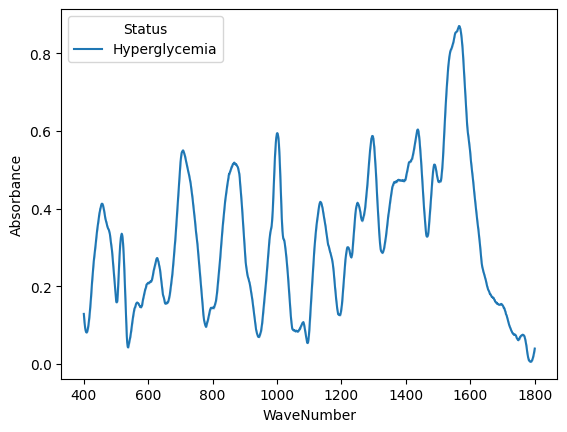

In [7]:
sns.lineplot(data=sample, x='WaveNumber', y='Absorbance', hue='Status', errorbar=('ci', False))

In [8]:
sample2 = df[df['SurID'] == '210114-2']

In [9]:
sample2

,SpecID,Seq,WaveNumber,SurID,Status,Absorbance
305301,210114-2-00,293,400.22778,210114-2,Normal,0.549968
305302,210114-2-00,294,400.91116,210114-2,Normal,0.495453
305303,210114-2-00,295,401.59454,210114-2,Normal,0.447446
305304,210114-2-00,296,402.27789,210114-2,Normal,0.405669
305305,210114-2-00,297,402.96127,210114-2,Normal,0.369847
...,...,...,...,...,...,...
407746,210114-2-49,2337,1797.03870,210114-2,Normal,0.010825
407747,210114-2-49,2338,1797.72200,210114-2,Normal,0.002474
407748,210114-2-49,2339,1798.40550,210114-2,Normal,-0.007059
407749,210114-2-49,2340,1799.08890,210114-2,Normal,-0.017838


<Axes: xlabel='WaveNumber', ylabel='Absorbance'>

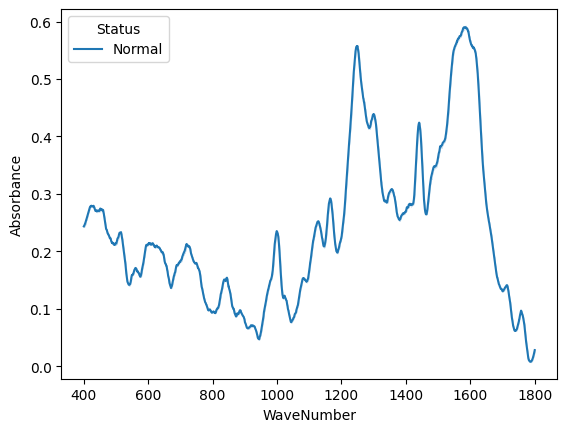

In [10]:
sns.lineplot(data=sample2, x='WaveNumber', y='Absorbance', hue='Status', errorbar=('ci', False))

Here we use scipy's function "find_peaks" to find all peaks in each individual spectra sample as well as pulling featurse such as prominence and width of peaks

In [11]:
df

,SpecID,Seq,WaveNumber,SurID,Status,Absorbance
0,201210-1-00,293,400.22778,201210-1,Normal,0.241429
1,201210-1-00,294,400.91116,201210-1,Normal,0.241086
2,201210-1-00,295,401.59454,201210-1,Normal,0.240729
3,201210-1-00,296,402.27789,201210-1,Normal,0.240359
4,201210-1-00,297,402.96127,201210-1,Normal,0.239978
...,...,...,...,...,...,...
6239200,210526-3-09,2337,1797.03870,210526-3,Hyperglycemia,0.060284
6239201,210526-3-09,2338,1797.72200,210526-3,Hyperglycemia,0.064627
6239202,210526-3-09,2339,1798.40550,210526-3,Hyperglycemia,0.069153
6239203,210526-3-09,2340,1799.08890,210526-3,Hyperglycemia,0.073864


In [12]:
pivoted_df = df.pivot(index='SpecID', columns='WaveNumber', values='Absorbance').reset_index()
pivoted_df.columns.name = None

statuses = df[['SpecID', 'Status']].drop_duplicates()

pivoted_df = pd.merge(pivoted_df, statuses, on='SpecID')
pivoted_df = pivoted_df.set_index('SpecID')

pivoted_df.head()

,400.22778,400.91116,401.59454,402.27789,402.96127,403.64465,404.32803,405.01138,405.69476,406.37814,...,1794.3053,1794.9886,1795.672,1796.3553,1797.0387,1797.722,1798.4055,1799.0889,1799.7722,Status
SpecID,,,,,,,,,,,,,,,,,,,,,
201210-1-00,0.241429,0.241086,0.240729,0.240359,0.239978,0.239588,0.239190,0.238786,0.238378,0.237968,...,0.040039,0.036223,0.032005,0.027369,0.022299,0.016778,0.010790,0.004317,-0.002655,Normal
201210-1-01,0.245468,0.250816,0.255986,0.260980,0.265798,0.270441,0.274912,0.279210,0.283337,0.287294,...,0.033509,0.035876,0.038589,0.041665,0.045119,0.048967,0.053224,0.057908,0.063032,Normal
201210-1-02,0.088417,0.085819,0.083482,0.081397,0.079552,0.077937,0.076541,0.075352,0.074360,0.073553,...,-0.003494,-0.003467,-0.003410,-0.003322,-0.003202,-0.003049,-0.002864,-0.002645,-0.002392,Normal
201210-1-03,0.177716,0.177087,0.176421,0.175722,0.174997,0.174250,0.173488,0.172716,0.171939,0.171163,...,-0.011364,-0.010940,-0.010482,-0.009991,-0.009467,-0.008912,-0.008328,-0.007716,-0.007076,Normal
201210-1-04,0.365204,0.348270,0.332714,0.318491,0.305553,0.293853,0.283344,0.273978,0.265708,0.258488,...,-0.037889,-0.038180,-0.038385,-0.038505,-0.038539,-0.038486,-0.038346,-0.038117,-0.037799,Normal


In [13]:
status_df = df.groupby('SpecID')[['SurID', 'Status']].first()
# surface_and_status.to_csv("../../data/surface_and_status.csv")
status_df

,SurID,Status
SpecID,,
201210-1-00,201210-1,Normal
201210-1-01,201210-1,Normal
201210-1-02,201210-1,Normal
201210-1-03,201210-1,Normal
201210-1-04,201210-1,Normal
...,...,...
210526-3-45,210526-3,Hyperglycemia
210526-3-46,210526-3,Hyperglycemia
210526-3-47,210526-3,Hyperglycemia


>#### **Calculate an adjacency matrix using a Gaussian Kernel**

In [14]:
from scipy.spatial.distance import pdist, squareform

# Drop the 'Status' column as it is not numeric
X = pivoted_df.drop(columns=['Status'])

# Calculate pairwise Euclidean distances
distances = pdist(X.values, metric='euclidean')

# Convert the condensed distances to a square matrix form
distance_matrix = squareform(distances)

In [15]:
def gaussian_kernel(distances, sigma):
    return np.exp(-distances**2 / (2 * sigma**2))

# Sigma is the bandwidth parameter
sigma = 7.5 # Adjust sigma as needed
kernel_matrix = gaussian_kernel(distance_matrix, sigma)

# Convert the kernel matrix to a DataFrame
kernel_df = pd.DataFrame(kernel_matrix, index=pivoted_df.index, columns=pivoted_df.index)

display(kernel_df.head())
kernel_df.shape

SpecID,201210-1-00,201210-1-01,201210-1-02,201210-1-03,201210-1-04,201210-1-05,201210-1-06,201210-1-07,201210-1-09,201210-1-10,...,210526-3-40,210526-3-41,210526-3-42,210526-3-43,210526-3-44,210526-3-45,210526-3-46,210526-3-47,210526-3-48,210526-3-49
SpecID,,,,,,,,,,,,,,,,,,,,,
201210-1-00,1.000000,0.764143,0.281686,0.286495,0.606296,0.519218,0.378281,0.435329,0.405590,0.417085,...,0.310547,0.281189,0.409122,0.229566,0.259994,0.230997,0.247458,0.251333,0.247756,0.227466
201210-1-01,0.764143,1.000000,0.175228,0.208799,0.551881,0.451917,0.360502,0.382277,0.392385,0.400121,...,0.298809,0.282623,0.341490,0.235565,0.262716,0.239818,0.259938,0.263003,0.260136,0.227551
201210-1-02,0.281686,0.175228,1.000000,0.459590,0.300859,0.333712,0.207759,0.260044,0.158411,0.116484,...,0.044102,0.037332,0.128337,0.025035,0.027804,0.022815,0.027433,0.031232,0.025547,0.024274
201210-1-03,0.286495,0.208799,0.459590,1.000000,0.231590,0.240418,0.194222,0.249760,0.198125,0.149410,...,0.070242,0.065843,0.143303,0.044841,0.049871,0.042137,0.049151,0.062416,0.051763,0.044914
201210-1-04,0.606296,0.551881,0.300859,0.231590,1.000000,0.896594,0.586029,0.578160,0.468118,0.464506,...,0.270834,0.243554,0.396007,0.196908,0.205074,0.187786,0.216776,0.207194,0.196469,0.192685


(3045, 3045)

**Construct the node and edge import files with the required Admin Import Headers**

In [16]:
relationship_df = kernel_df.reset_index()
relationship_df = relationship_df.melt(id_vars='SpecID', var_name=':END_ID', value_name='Weight:float')
relationship_df = relationship_df.rename(columns={'SpecID': ':START_ID'})
relationship_df[':TYPE'] = 'LINK'

Drop Relationships a node has with itself, along with repeat relationships.

In [17]:
relationship_df = relationship_df[relationship_df[":START_ID"] != relationship_df[":END_ID"]]
relationship_df = relationship_df[relationship_df[":START_ID"] < relationship_df[":END_ID"]]  # Drops redundant relationships
relationship_df

,:START_ID,:END_ID,Weight:float,:TYPE
3045,201210-1-00,201210-1-01,0.764143,LINK
6090,201210-1-00,201210-1-02,0.281686,LINK
6091,201210-1-01,201210-1-02,0.175228,LINK
9135,201210-1-00,201210-1-03,0.286495,LINK
9136,201210-1-01,201210-1-03,0.208799,LINK
...,...,...,...,...
9272019,210526-3-44,210526-3-49,0.876505,LINK
9272020,210526-3-45,210526-3-49,0.843342,LINK
9272021,210526-3-46,210526-3-49,0.880126,LINK
9272022,210526-3-47,210526-3-49,0.828174,LINK


In [18]:
node_df = status_df.reset_index()
node_df.rename(columns={'SpecID':'SpecID:ID', 'Status':'Status:LABEL', 'SurID':'SurID:LABEL'}, inplace=True)
node_df

,SpecID:ID,SurID:LABEL,Status:LABEL
0,201210-1-00,201210-1,Normal
1,201210-1-01,201210-1,Normal
2,201210-1-02,201210-1,Normal
3,201210-1-03,201210-1,Normal
4,201210-1-04,201210-1,Normal
...,...,...,...
3040,210526-3-45,210526-3,Hyperglycemia
3041,210526-3-46,210526-3,Hyperglycemia
3042,210526-3-47,210526-3,Hyperglycemia
3043,210526-3-48,210526-3,Hyperglycemia


In [19]:
node_df.to_csv(f"{neo4j_directory}/import/nodes.csv", index=False)

In [20]:
relationship_df.to_csv(f"{neo4j_directory}/import/relationships.csv", index=False)

In [21]:
from neo4j import GraphDatabase
import os
import pandas as pd
import shutil
import subprocess

This moves the nodes and relationships files from data/current_working_graph into the DBMS import folder.

At the moment this uses local paths, but the rest should be automated.

Then run the admin import command.

In [22]:
os_name = os.name

if os_name == 'nt':
    working_dir = f'{neo4j_directory}/bin'
    command = 'neo4j-admin database import full --nodes=import/nodes.csv --relationships=import/relationships.csv --overwrite-destination neo4j'
    result = subprocess.run(command, shell=True, cwd=working_dir, capture_output=True, text=True)
else:
    working_dir = f'{neo4j_directory}'
    command = [
    './bin/neo4j-admin', 'database', 'import', 'full',
    '--nodes=import/nodes.csv',
    '--relationships=import/relationships.csv',
    '--overwrite-destination',  'neo4j'
    ]
    result = subprocess.run(command, cwd=working_dir, stdout=subprocess.PIPE, stderr=subprocess.PIPE)


# Check if the command was successful
if result.returncode == 0:
    print("Import successful")
    print(result.stdout)
else:
    print("Error during import:")
    print(result.stderr)

Import successful
b"Neo4j version: 5.12.0\nImporting the contents of these files into /home/stang/.config/Neo4j Desktop/Application/relate-data/dbmss/dbms-f413c23c-3abd-47d4-a611-9ffc2f61bbc5/data/databases/neo4j:\nNodes:\n  /home/stang/.config/Neo4j Desktop/Application/relate-data/dbmss/dbms-f413c23c-3abd-47d4-a611-9ffc2f61bbc5/import/nodes.csv\n\nRelationships:\n  /home/stang/.config/Neo4j Desktop/Application/relate-data/dbmss/dbms-f413c23c-3abd-47d4-a611-9ffc2f61bbc5/import/relationships.csv\n\n\nAvailable resources:\n  Total machine memory: 15.47GiB\n  Free machine memory: 389.3MiB\n  Max heap memory : 910.5MiB\n  Max worker threads: 8\n  Configured max memory: 189.5MiB\n  High parallel IO: true\n\nCypher type normalization is enabled (disable with --normalize-types=false):\n  Property type of 'Weight' normalized from 'float' --> 'double' in /home/stang/.config/Neo4j Desktop/Application/relate-data/dbmss/dbms-f413c23c-3abd-47d4-a611-9ffc2f61bbc5/import/relationships.csv\n\nImport s

In [111]:
if os_name != 'nt':
    command = [
        './bin/neo4j', 'restart'
    ]

    result = subprocess.run(command, cwd=neo4j_directory, stdout=subprocess.PIPE, stderr=subprocess.PIPE)

    # Check if the command was successful
    if result.returncode == 0:
        print("Restart successful")
        print(result.stdout)
    else:
        print("Error during restart:")
        print(result.stderr)

Restart successful
b'Stopping Neo4j....... stopped.\nConfiguration file validation successful (with warnings).\nDirectories in use:\nhome:         /home/stang/.config/Neo4j Desktop/Application/relate-data/dbmss/dbms-f413c23c-3abd-47d4-a611-9ffc2f61bbc5\nconfig:       /home/stang/.config/Neo4j Desktop/Application/relate-data/dbmss/dbms-f413c23c-3abd-47d4-a611-9ffc2f61bbc5/conf\nlogs:         /home/stang/.config/Neo4j Desktop/Application/relate-data/dbmss/dbms-f413c23c-3abd-47d4-a611-9ffc2f61bbc5/logs\nplugins:      /home/stang/.config/Neo4j Desktop/Application/relate-data/dbmss/dbms-f413c23c-3abd-47d4-a611-9ffc2f61bbc5/plugins\nimport:       /home/stang/.config/Neo4j Desktop/Application/relate-data/dbmss/dbms-f413c23c-3abd-47d4-a611-9ffc2f61bbc5/import\ndata:         /home/stang/.config/Neo4j Desktop/Application/relate-data/dbmss/dbms-f413c23c-3abd-47d4-a611-9ffc2f61bbc5/data\ncertificates: /home/stang/.config/Neo4j Desktop/Application/relate-data/dbmss/dbms-f413c23c-3abd-47d4-a611-9ffc

Run and connect to the Neo4j Database

In [112]:
from neo4j import GraphDatabase

uri = "neo4j://localhost:7687"
username = "neo4j"              # Neo4J username
#Password defined at the top of the notebook

# Create a driver instance
driver = GraphDatabase.driver(uri, auth=(username, password))

# Ensure you close the driver connection when your program ends
def close_driver():
    driver.close()

In [113]:
from neo4j import GraphDatabase

def project_graph(surface):
    # Function to project the graph
    def _project_graph(tx):
        query = """
        CALL gds.graph.project(
          $graphName, 
          $nodeLabel,
          {
            LINK: {
              orientation: 'UNDIRECTED',
              properties: 'Weight'
            }
          }
        )
        """
        tx.run(query, graphName=surface, nodeLabel=surface)
    
    # Initialize the Neo4j driver with your URI, username, and password
    driver = GraphDatabase.driver("neo4j://localhost:7687", auth=("neo4j", password))
    
    with driver.session() as session:
        # Call the inner function within a transaction
        session.execute_write(_project_graph)
    
    # Close the driver connection when done
    driver.close()


Define the graph algorithms.

In [114]:
from neo4j import GraphDatabase

def run_pagerank_centrality(graph):
    # Inner function to execute the PageRank query
    def _run_pagerank_centrality(tx):
        query = """
        CALL gds.pageRank.stream($graphName, {
            relationshipWeightProperty: 'Weight'
        })
        YIELD nodeId, score
        RETURN gds.util.asNode(nodeId).SpecID AS name, score
        ORDER BY score DESC, name ASC
        """
        results = tx.run(query, graphName=graph)
        return [(record["name"], record["score"]) for record in results]
    
    # Initialize the Neo4j driver with your URI, username, and password
    driver = GraphDatabase.driver("neo4j://localhost:7687", auth=("neo4j", password))
    
    with driver.session() as session:
        # Call the inner function within a transaction and get the results
        results = session.execute_read(_run_pagerank_centrality)
        return results  
        return (name_list, score_list)
    # Close the driver connection when done
    driver.close()


In [115]:
surfaces = node_df['SurID:LABEL'].unique()
surfaces = surfaces.tolist()

In [126]:
pagerank_dfs = []

for item in surfaces:
    #project_graph(surface=item)
    pagerank_results = run_pagerank_centrality(graph=item)
    pagerank_df = pd.DataFrame(pagerank_results, columns=['name', 'PageRank'])
    pagerank_df['Surface PageRank Rank'] = pagerank_df['PageRank'].rank(method='dense', ascending=False)  # Get the rank of centrality of each spectra within the surface
    pagerank_df = pagerank_df[pagerank_df['Surface PageRank Rank'] <= 10]
    print(pagerank_df)
    pagerank_dfs.append(pagerank_df)
    

          name  PageRank  Surface PageRank Rank
0  201210-1-47  1.115594                    1.0
1  201210-1-39  1.110905                    2.0
2  201210-1-49  1.108847                    3.0
3  201210-1-46  1.107566                    4.0
4  201210-1-37  1.101252                    5.0
5  201210-1-48  1.097892                    6.0
6  201210-1-30  1.097299                    7.0
7  201210-1-29  1.095769                    8.0
8  201210-1-42  1.093660                    9.0
9  201210-1-28  1.092721                   10.0
          name  PageRank  Surface PageRank Rank
0  201210-2-13  1.184409                    1.0
1  201210-2-21  1.173081                    2.0
2  201210-2-14  1.139757                    3.0
3  201210-2-44  1.137719                    4.0
4  201210-2-43  1.136270                    5.0
5  201210-2-07  1.133863                    6.0
6  201210-2-19  1.130085                    7.0
7  201210-2-42  1.129700                    8.0
8  201210-2-20  1.120767                

In [127]:
pagerank_results = pd.concat(pagerank_dfs).rename(columns={'name':'SpecID'})
pagerank_results

,SpecID,PageRank,Surface PageRank Rank
0,201210-1-47,1.115594,1.0
1,201210-1-39,1.110905,2.0
2,201210-1-49,1.108847,3.0
3,201210-1-46,1.107566,4.0
4,201210-1-37,1.101252,5.0
...,...,...,...
5,210526-3-22,1.096970,6.0
6,210526-3-18,1.091621,7.0
7,210526-3-23,1.089858,8.0
8,210526-3-20,1.079801,9.0


In [ ]:
S

In [90]:
def delete_projection(tx):
    query = """
    CALL gds.graph.drop('myGraph')
    """
    tx.run(query)

# Use a session to execute the graph projection
with driver.session() as session:
    session.execute_write(delete_projection)

In [91]:
close_driver()